In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
!pip install pandas
import pandas as pd
df = pd.read_csv("store_sales.csv")
import numpy as np

In [3]:
import seaborn as sns
import matplotlib.pyplot as mlt
%matplotlib inline

In [4]:
df.head()

,store_id,city,Jan,Feb,Mar,Apr,May,Jun,July,Aug,Sep,Oct,Nov,Dec
0,S_1,Texas,8,20,13,21,17,20,24,17,16,9,7,6
1,S_2,California,12,19,15,15,11,19,7,15,10,11,21,19
2,S_3,California,16,16,14,19,23,6,13,13,15,14,24,8
3,S_4,Texas,8,18,13,10,14,14,6,8,8,18,7,11
4,S_5,Texas,19,5,24,9,5,24,10,5,24,15,6,13


In [5]:
# df.groupby(["city","store_id"])["Jan"].mean().head() # by row

In [6]:
# df.apply("mean", axis=0) # by column

In [7]:
# df.apply("mean", axis = 1) # by row

In [9]:
df.dtypes

store_id    object
city        object
Jan          int64
Feb          int64
Mar          int64
Apr          int64
May          int64
Jun          int64
July         int64
Aug          int64
Sep          int64
Oct          int64
Nov          int64
Dec          int64
dtype: object

In [10]:
def bonus(sales_col):
    elig = np.where(sales_col > 10, "eligible", "not eligible")
    return elig

In [11]:
df2 = df.select_dtypes(include=['int64','float64']).apply(bonus)

In [12]:
df2

,Jan,Feb,Mar,Apr,May,Jun,July,Aug,Sep,Oct,Nov,Dec
0,not eligible,eligible,eligible,eligible,eligible,eligible,eligible,eligible,eligible,not eligible,not eligible,not eligible
1,eligible,eligible,eligible,eligible,eligible,eligible,not eligible,eligible,not eligible,eligible,eligible,eligible
2,eligible,eligible,eligible,eligible,eligible,not eligible,eligible,eligible,eligible,eligible,eligible,not eligible
3,not eligible,eligible,eligible,not eligible,eligible,eligible,not eligible,not eligible,not eligible,eligible,not eligible,eligible
4,eligible,not eligible,eligible,not eligible,not eligible,eligible,not eligible,not eligible,eligible,eligible,not eligible,eligible
...,...,...,...,...,...,...,...,...,...,...,...,...
95,not eligible,not eligible,eligible,eligible,not eligible,eligible,eligible,eligible,eligible,not eligible,eligible,eligible
96,eligible,not eligible,not eligible,eligible,eligible,not eligible,eligible,eligible,not eligible,not eligible,eligible,not eligible
97,eligible,not eligible,not eligible,eligible,eligible,eligible,eligible,not eligible,not eligible,eligible,eligible,eligible
98,eligible,eligible,not eligible,not eligible,eligible,eligible,eligible,eligible,eligible,eligible,eligible,not eligible


In [13]:
 # df and df2 merge into df3

In [14]:
df3 = pd.concat([df,df2], axis=1)

In [15]:
df3.head()

,store_id,city,Jan,Feb,Mar,Apr,May,Jun,July,Aug,...,Mar,Apr,May,Jun,July,Aug,Sep,Oct,Nov,Dec
0,S_1,Texas,8,20,13,21,17,20,24,17,...,eligible,eligible,eligible,eligible,eligible,eligible,eligible,not eligible,not eligible,not eligible
1,S_2,California,12,19,15,15,11,19,7,15,...,eligible,eligible,eligible,eligible,not eligible,eligible,not eligible,eligible,eligible,eligible
2,S_3,California,16,16,14,19,23,6,13,13,...,eligible,eligible,eligible,not eligible,eligible,eligible,eligible,eligible,eligible,not eligible
3,S_4,Texas,8,18,13,10,14,14,6,8,...,eligible,not eligible,eligible,eligible,not eligible,not eligible,not eligible,eligible,not eligible,eligible
4,S_5,Texas,19,5,24,9,5,24,10,5,...,eligible,not eligible,not eligible,eligible,not eligible,not eligible,eligible,eligible,not eligible,eligible


In [16]:
df3['Jan']


,Jan,Jan
0,8,not eligible
1,12,eligible
2,16,eligible
3,8,not eligible
4,19,eligible
...,...,...
95,7,not eligible
96,13,eligible
97,16,eligible
98,18,eligible


In [17]:
# df["jan_bonus"] = bonus(df["Jan"],10) # adding new column 

In [18]:
# median and mean for each store 

In [19]:
df3["median"] = df.apply("median", axis=1)
df3["mean"] = df.apply("mean", axis=1)

In [20]:
# del df3["average_sale"] # delete a column

In [21]:
df3 # final table 

,store_id,city,Jan,Feb,Mar,Apr,May,Jun,July,Aug,...,May,Jun,July,Aug,Sep,Oct,Nov,Dec,median,mean
0,S_1,Texas,8,20,13,21,17,20,24,17,...,eligible,eligible,eligible,eligible,eligible,not eligible,not eligible,not eligible,16.5,14.833333
1,S_2,California,12,19,15,15,11,19,7,15,...,eligible,eligible,not eligible,eligible,not eligible,eligible,eligible,eligible,15.0,14.500000
2,S_3,California,16,16,14,19,23,6,13,13,...,eligible,not eligible,eligible,eligible,eligible,eligible,eligible,not eligible,14.5,15.083333
3,S_4,Texas,8,18,13,10,14,14,6,8,...,eligible,eligible,not eligible,not eligible,not eligible,eligible,not eligible,eligible,10.5,11.250000
4,S_5,Texas,19,5,24,9,5,24,10,5,...,not eligible,eligible,not eligible,not eligible,eligible,eligible,not eligible,eligible,11.5,13.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,S_96,Texas,7,10,20,20,10,15,15,21,...,not eligible,eligible,eligible,eligible,eligible,not eligible,eligible,eligible,15.0,15.416667
96,S_97,California,13,6,7,15,22,10,21,23,...,eligible,not eligible,eligible,eligible,not eligible,not eligible,eligible,not eligible,11.0,12.833333
97,S_98,Texas,16,9,6,14,20,13,11,10,...,eligible,eligible,eligible,not eligible,not eligible,eligible,eligible,eligible,13.5,14.000000
98,S_99,Arizona,18,16,9,5,12,22,11,13,...,eligible,eligible,eligible,eligible,eligible,eligible,eligible,not eligible,14.5,14.416667


### ploting

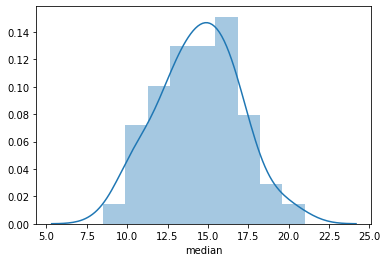

In [22]:
sns.distplot(df3['median'], kde=True)

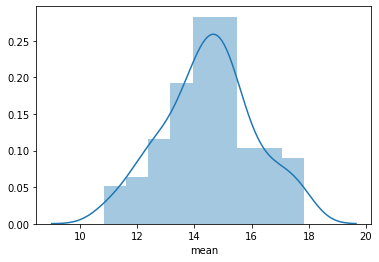

In [23]:
sns.distplot(df3['mean'], kde=True)